In [1]:
#importing libraies
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
#read the netflix_titles dataset
df=pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [4]:
#finding the null values
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
df.shape

(8807, 12)

In [6]:
#sum of all null values
df.isnull().sum().sum()

4307

In [7]:
#preprocess the data
df.director.fillna("No Director", inplace=True)
df.cast.fillna("No Cast", inplace=True)
df.country.fillna("Country Unavailable", inplace=True)
df.dropna(subset=["date_added", "rating"], inplace=True)
df.dropna(subset=["duration", "rating"], inplace=True)

In [8]:
#checking null values
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [9]:
#checking duplicated values
df.duplicated().sum()

0

In [10]:
df1=df.copy()

# Data Visulization

<AxesSubplot:xlabel='type', ylabel='count'>

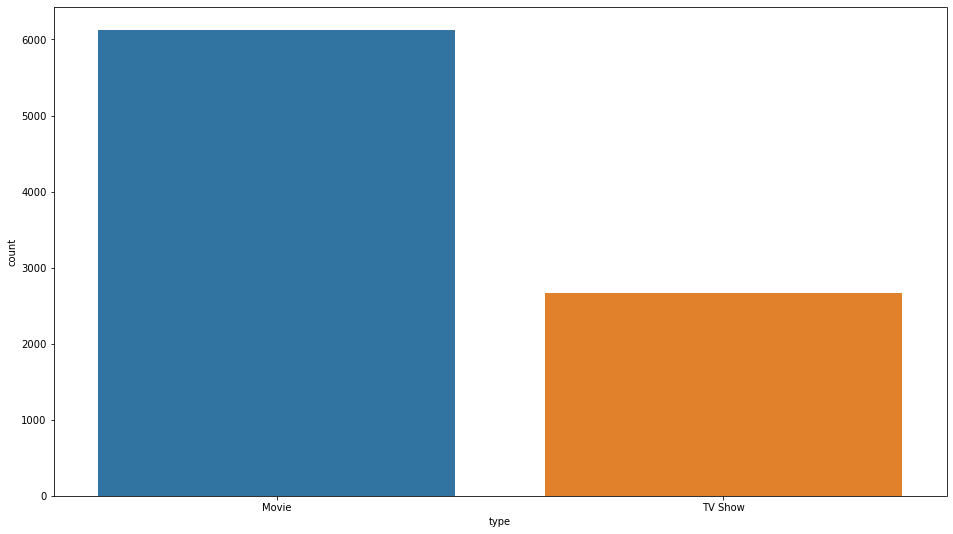

In [11]:
plt.figure(figsize=(16,9))
sns.countplot(df['type'])

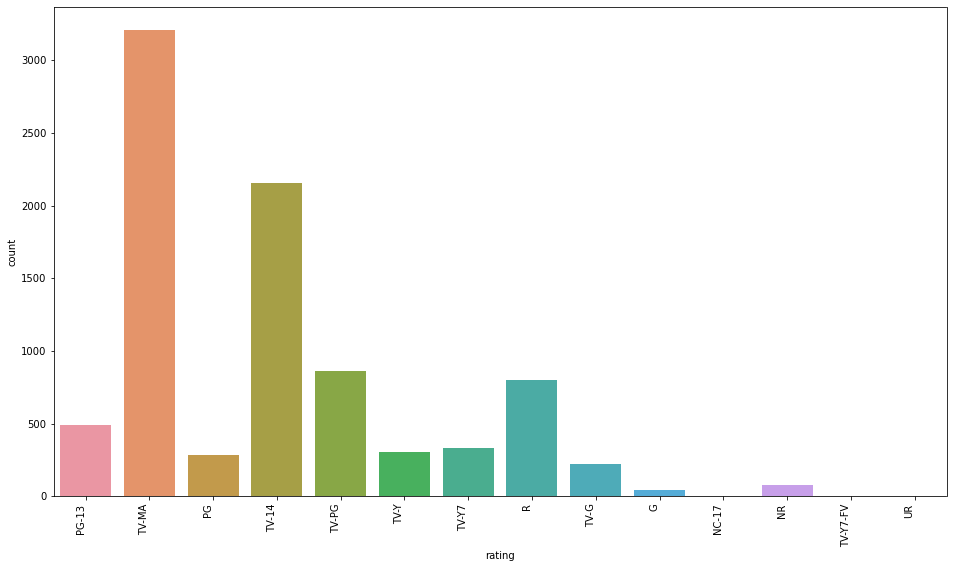

In [12]:
plt.figure(figsize=(16,9))
sns.countplot(df['rating'])
sns.countplot(df['rating']).set_xticklabels(sns.countplot(df['rating']).get_xticklabels(), rotation=90, ha="right")
plt.show()


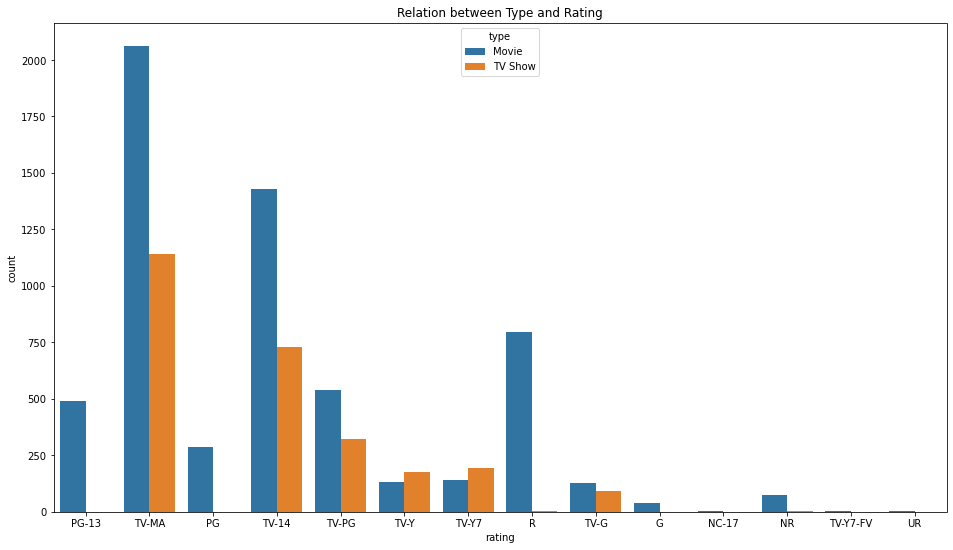

In [13]:
plt.figure(figsize=(16,9))
sns.countplot(x='rating',hue='type',data=df)
plt.title('Relation between Type and Rating')
plt.show()

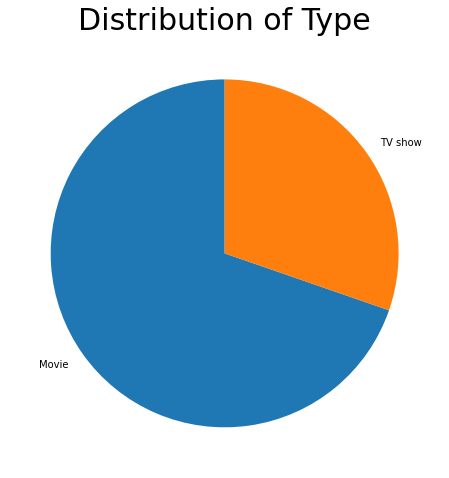

In [14]:
plt.figure(figsize=(11,8))
plt.pie(df['type'].value_counts(),labels=['Movie', 'TV show'],startangle = 90)
plt.title('Distribution of Type', fontsize = 30)
plt.show()

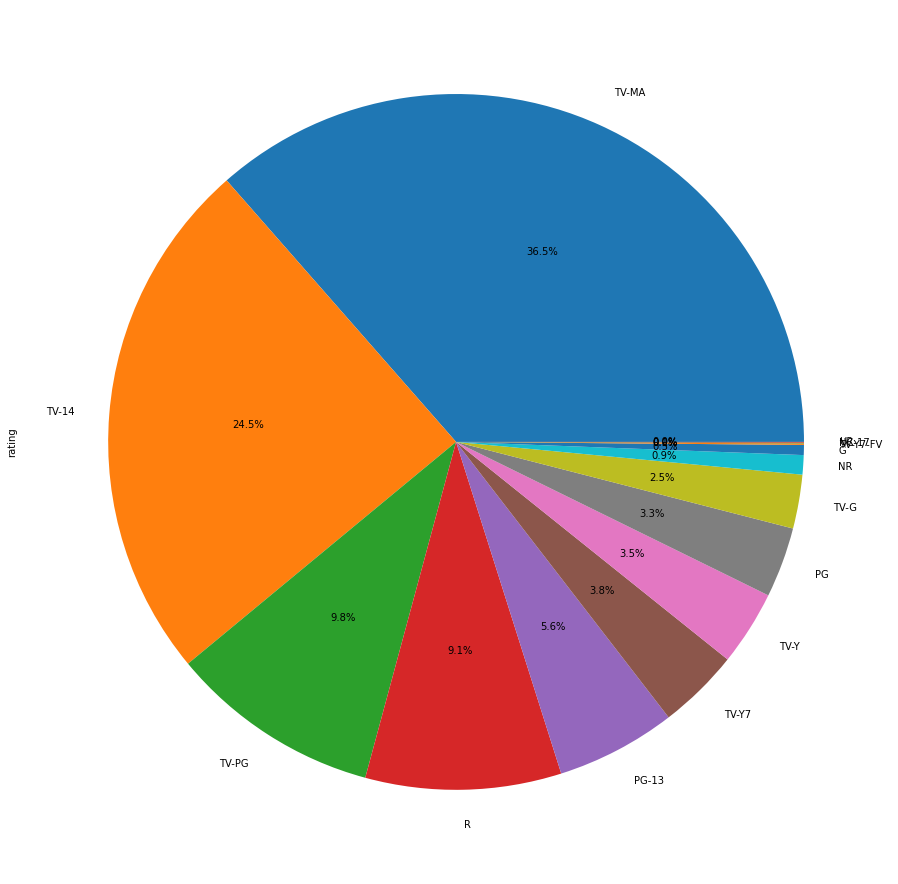

In [15]:
df['rating'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(16,16))
plt.show()

In [16]:
Last_fifteen_years = df[df['release_year']>2005 ]

In [17]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
#importing Wordcloud
from wordcloud import WordCloud

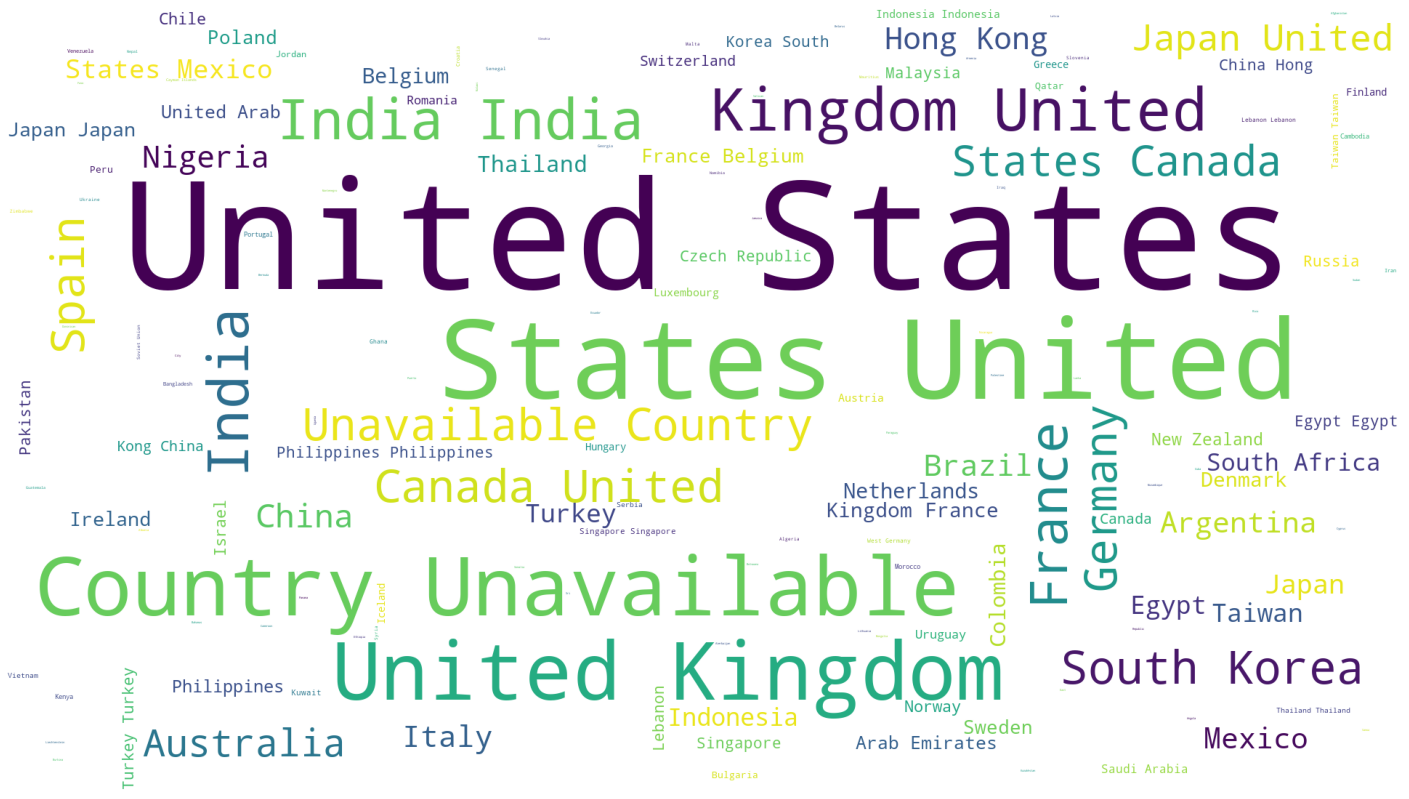

In [19]:
#visulizing the country using wordcloud
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df1.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()

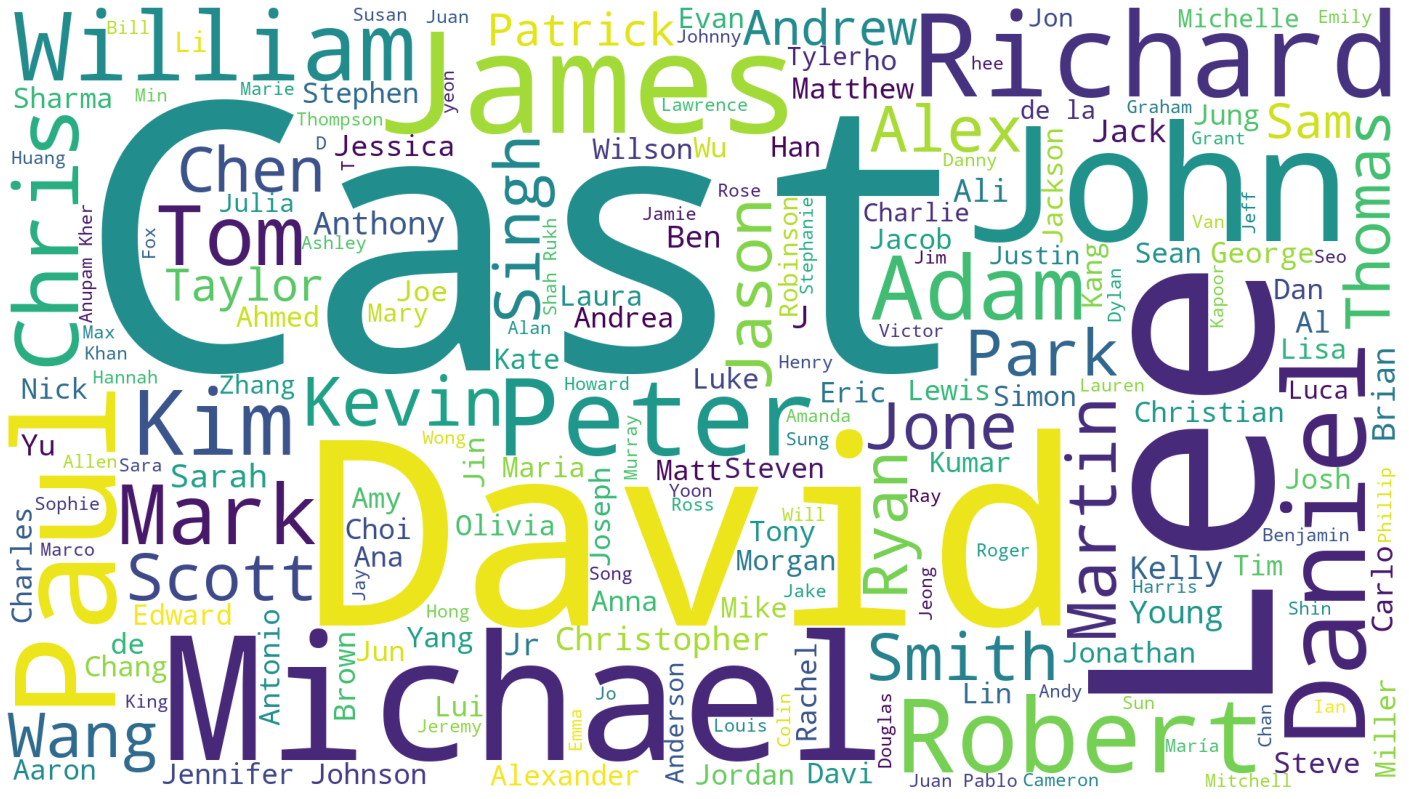

In [20]:
##visulizing the cast using wordcloud
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.cast))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

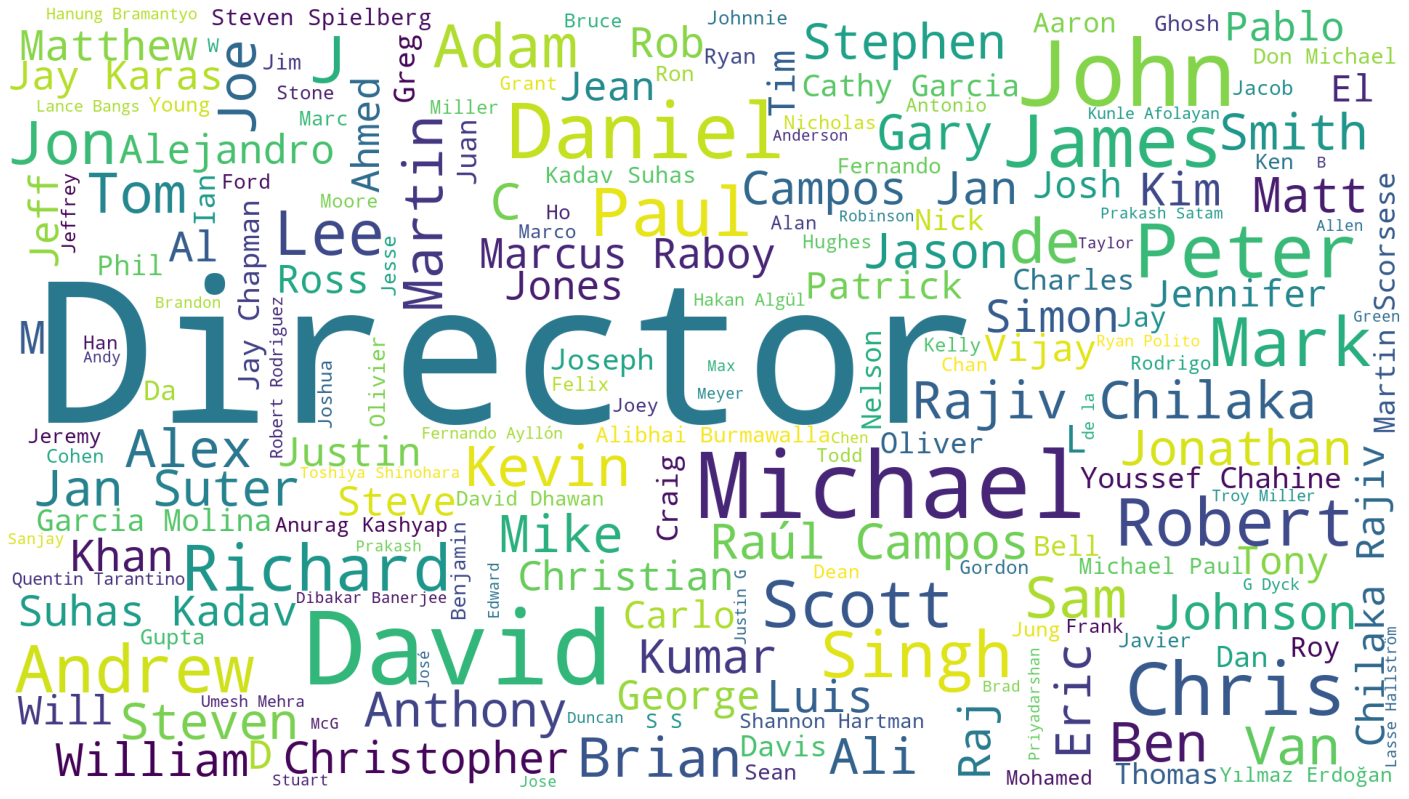

In [21]:
#visulizing the director using wordcloud
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.director))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('director.png')
plt.show()

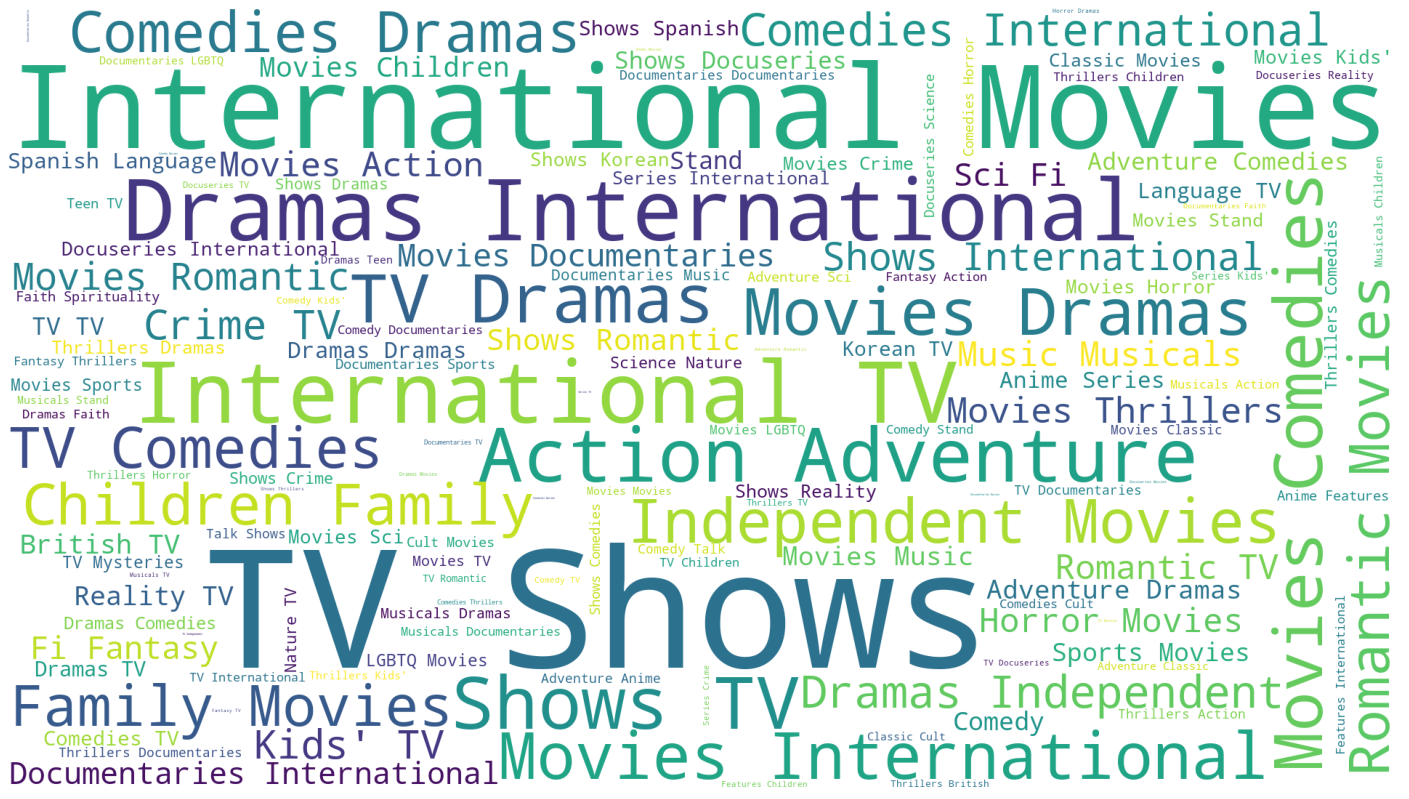

In [22]:
#visulizing the category using wordcloud
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.listed_in))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('category.png')
plt.show()

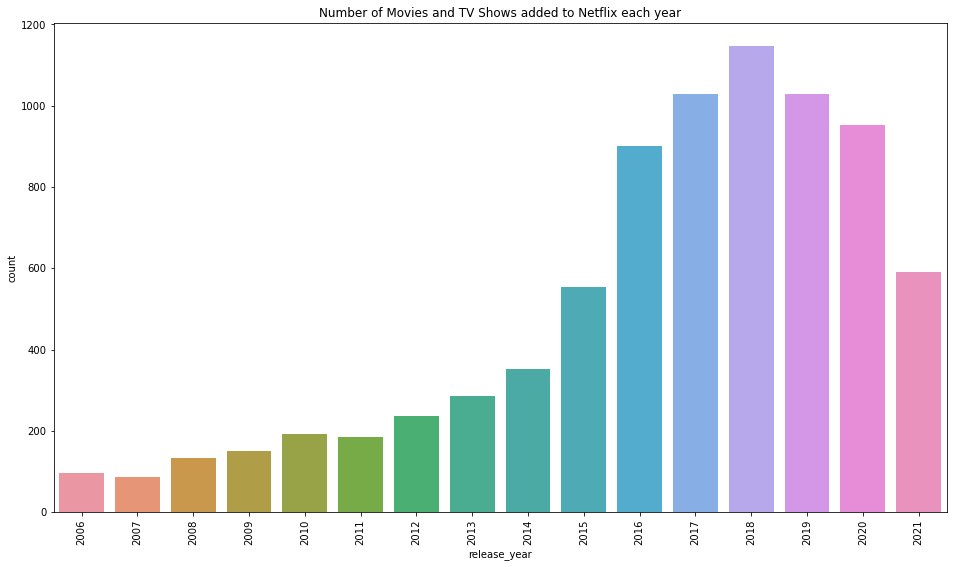

In [23]:
#no.of movies released year
plt.figure(figsize=(16, 9))
sns.countplot(Last_fifteen_years['release_year'])
plt.title('Number of Movies and TV Shows added to Netflix each year')
plt.xticks(rotation=90)
plt.show()

In [24]:
df_movie = df[df['type'] == 'Movie']
df_tvshow = df[df['type'] == 'TV Show']

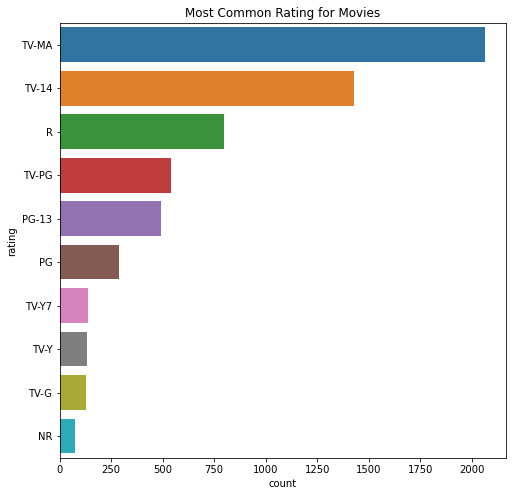

In [25]:
# Checking the most common rating for movies
plt.figure(figsize=(8, 8))
sns.countplot(y='rating', data=df_movie, order=df_movie['rating'].value_counts().index[:10])
plt.title('Most Common Rating for Movies')
plt.show()

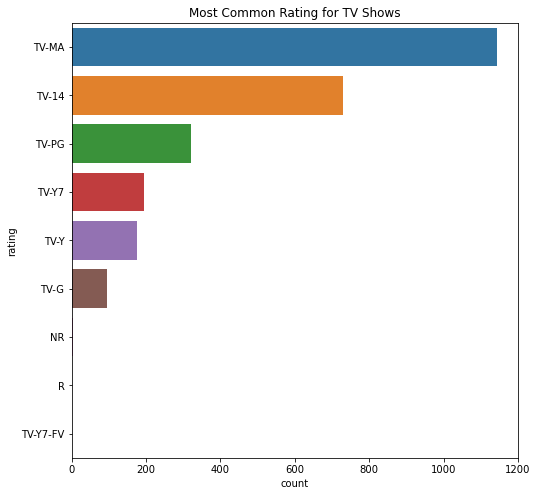

In [26]:
# Checking the most common rating for TV Shows
plt.figure(figsize=(8, 8))
sns.countplot(y='rating', data=df_tvshow, order=df_tvshow['rating'].value_counts().index[:10])
plt.title('Most Common Rating for TV Shows')
plt.show()


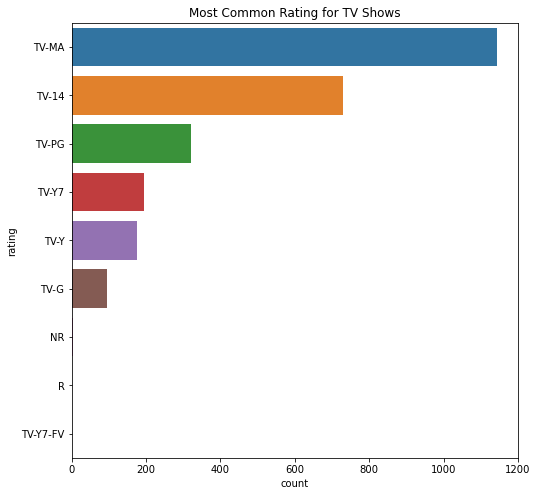

In [27]:
# Checking the most common rating for TV Shows
plt.figure(figsize=(8, 8))
sns.countplot(y='rating', data=df_tvshow, order=df_tvshow['rating'].value_counts().index[:10])
plt.title('Most Common Rating for TV Shows')
plt.show()


In [28]:
# Let's check the number of movies and TV shows available in each country
df['country'].value_counts().head(15)

United States          2809
India                   972
Country Unavailable     829
United Kingdom          418
Japan                   243
South Korea             199
Canada                  181
Spain                   145
France                  124
Mexico                  110
Egypt                   106
Turkey                  105
Nigeria                  95
Australia                85
Taiwan                   81
Name: country, dtype: int64

In [29]:
# Let's check the top 10 most popular directors
df['director'].value_counts().head(10)

No Director               2621
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Jay Chapman                 12
Youssef Chahine             12
Name: director, dtype: int64

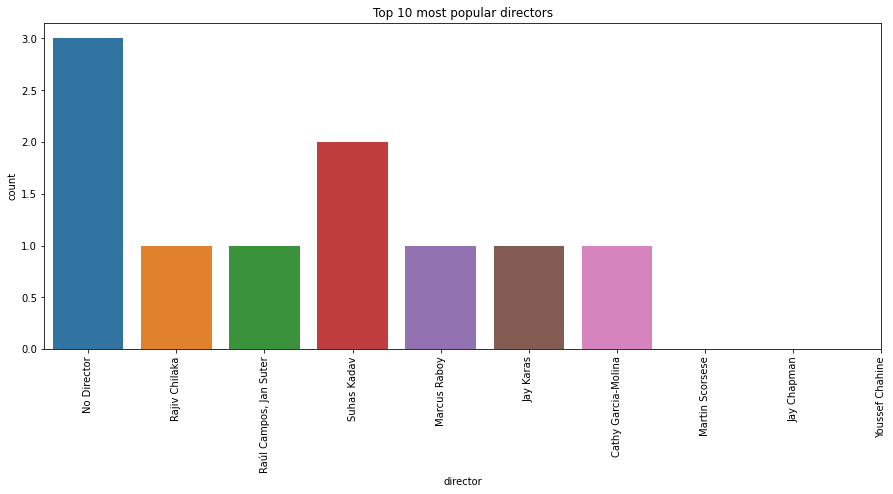

In [30]:
# Let's visualize the top 10 most popular directors
plt.figure(figsize=(15, 6))
sns.countplot(df['director'].value_counts().head(10))
plt.title('Top 10 most popular directors')
plt.xticks(rotation=90)
plt.xticks(ticks=range(10), labels=df['director'].value_counts().head(10).index)
plt.show()